# Network Dynamics: Node Centrality - Lab

## Introduction

In this lab, you'll get a chance to practice implementing and interpreting the centrality metrics from the previous section. You'll do this be investigating the social network from Game of Thrones!

## Objectives
You will be able to:
- Understand and explain network centrality and its importance in graph analysis
- Understand and calculate Degree, Closeness, Betweenness and Eigenvector centrality measures
- Describe the use case for several centrality measures

## Character Interaction Graph Data

A. J. Beveridge, and J. Shan  created a network from George R. Martin's "A song of ice and fire" by extracting relationships between characters of the story. [The dataset is available at Github](https://github.com/mathbeveridge/asoiaf). Relationships between characters were formed every time a character's name appears within 15 words of another character. This was designed as an approximate metric for character's interactions with each other. The results of this simple analysis are quite profound and produce interesting visuals such as this graph:

<img src="images/got.png" width=800>

With that, it's your turn to start investigating the most central characters!

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##  Load the dataset 

Start by loading the dataset as a pandas DataFrame. From this, you'll then create a network representation of the dataset using NetworkX. 

The dataset is stored in the file `asoiaf-all-edges.csv`.

In [3]:
df = pd.read_csv('asoiaf-all-edges.csv')
df

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
5,Addam-Marbrand,Joffrey-Baratheon,Undirected,5,3
6,Addam-Marbrand,Kevan-Lannister,Undirected,6,3
7,Addam-Marbrand,Lyle-Crakehall,Undirected,7,4
8,Addam-Marbrand,Oberyn-Martell,Undirected,8,3
9,Addam-Marbrand,Tyrion-Lannister,Undirected,9,7


## Create a Graph

Now that you have the data loaded as a pandas DataFrame, iterate through the data and create appropriate edges to the empty graph you instantiated above. Be sure to add the weight to each edge.

In [6]:
G = nx.Graph()

# Read edge lists into dataframes
for row in df.index:
    source = df['Source'][row]
    target = df['Target'][row]
    weight = df['we()ight'][row]
    print(row)
    G.add_edge(source,target, weight=weight)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328


## Calculate Degree

To start the investigation of the most central characters in the books, calculate the degree centrality for each character. Then create a bar graph of the top 10 characters according to degree centrality.

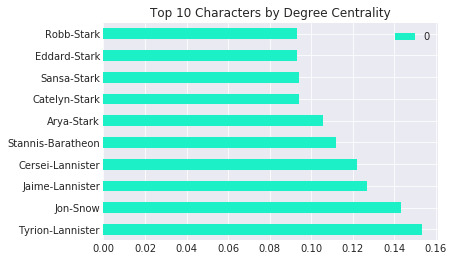

In [7]:
pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index').sort_values(by=0, ascending=False).head(10).plot(kind='barh', color="#1cf0c7")
plt.title('Top 10 Characters by Degree Centrality');

## Closeness Centrality

Repeat the above exercise for the top 10 characters according to closeness centrality.

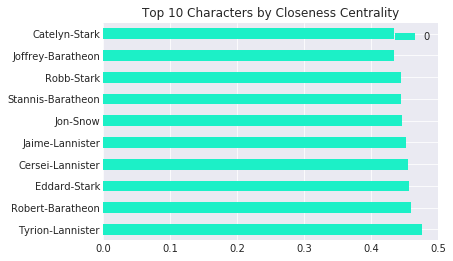

In [8]:
pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index').sort_values(by=0, ascending=False).head(10).plot(kind='barh', color="#1cf0c7")
plt.title('Top 10 Characters by Closeness Centrality');

## Betweeness Centrality

Repeat the process one more time for betweeness centrality.

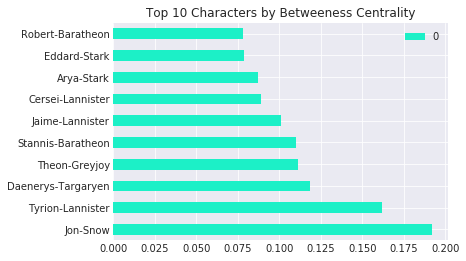

In [9]:
pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index').sort_values(by=0, ascending=False).head(10).plot(kind='barh', color="#1cf0c7")
plt.title('Top 10 Characters by Betweeness Centrality');

## Putting it All Together

Great! Now try putting all of these metrics together along with eigenvector centrality. Combine all four metrics into a single dataframe for each character.

In [10]:
degrees = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigs = nx.eigenvector_centrality(G)
centrality = pd.DataFrame([degrees, closeness, betweeness, eigs]).transpose()
centrality.columns = ["degrees", "closeness", "betweeness", "eigs"]
centrality = centrality.sort_values(by='eigs', ascending=False)
centrality.head()

,degrees,closeness,betweeness,eigs
Tyrion-Lannister,0.153459,0.476333,0.162191,0.251558
Cersei-Lannister,0.122013,0.454545,0.088704,0.235771
Jaime-Lannister,0.127044,0.451961,0.100838,0.226339
Joffrey-Baratheon,0.086792,0.433952,0.031759,0.214376
Sansa-Stark,0.094340,0.433007,0.048691,0.205842


## Identifying Key Players

While centrality can tell us a lot, you've also begun to see how certain individuals may not be the most central characters, but can be pivotal in the flow of information from one community to another. In the previous lesson, such nodes were labeled as 'bridges' acting as the intermediaries between two clusters. Try and identify such characters from this dataset.

In [11]:
centrality['bridge_proxy'] = centrality['betweeness'] / centrality.degrees
centrality = centrality.sort_values(by='bridge_proxy', ascending=False)
centrality.head(10)

,degrees,closeness,betweeness,eigs,bridge_proxy
Aggar,0.005031,0.269036,0.007997,0.001665,1.589358
Alleras,0.010063,0.272915,0.014199,0.002928,1.411040
Theon-Greyjoy,0.083019,0.423323,0.111283,0.102481,1.340458
Jon-Snow,0.143396,0.445378,0.192120,0.144211,1.339782
Cutjack,0.003774,0.255135,0.005028,0.001404,1.332494
Red-Oarsman,0.003774,0.261255,0.005025,0.001042,1.331654
Daenerys-Targaryen,0.091824,0.383317,0.118418,0.063043,1.289621
Victarion-Greyjoy,0.030189,0.333753,0.036451,0.009395,1.207431
Pate-(novice),0.008805,0.215097,0.010042,0.000175,1.140428
Tyrion-Lannister,0.153459,0.476333,0.162191,0.251558,1.056901


## Drawing the Graph

To visualize all of these relationships, draw a graph of the network.

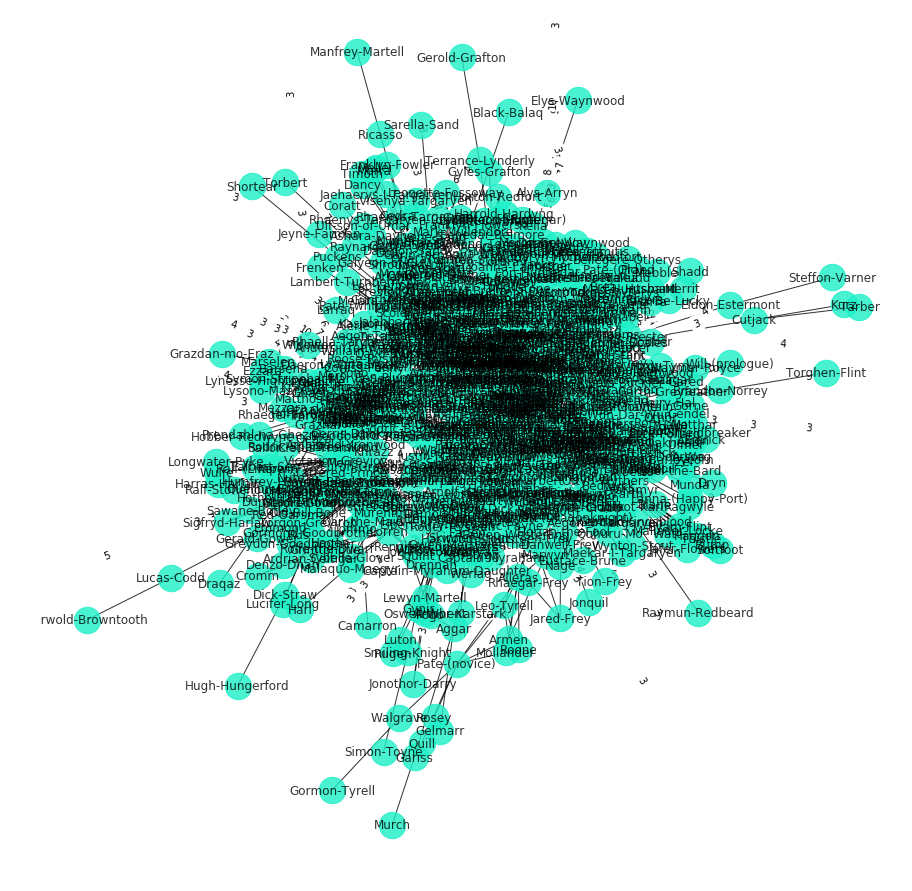

In [12]:
edge_labels = labels = nx.get_edge_attributes(G,'weight')
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True, pos=nx.spring_layout(G),
        edge_labels=edge_labels, alpha=.8, node_color="#1cf0c7", node_size=700);
nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G),edge_labels=labels);

## Subsetting the Graph

As you can see, the above graph is undoubtedly noisy, making it difficult to discern any useful patterns. As such, reset the graph and only add edges whose weight is 75 or greater. From there, redraw the graph. To further help with the display, try using `nx.spring_layout(G)` for the position. To jazz it up, try and recolor those nodes which you identified as bridge or bottleneck nodes to communication.

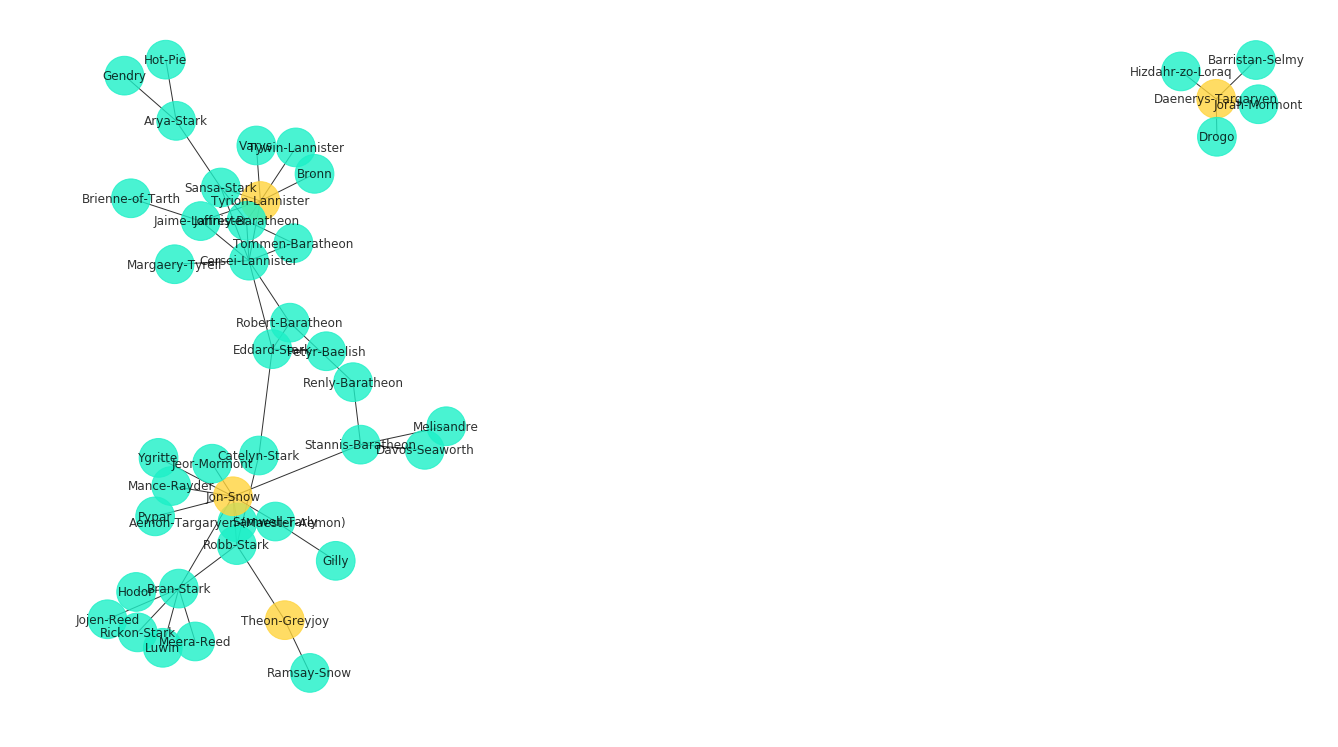

In [13]:
# Read edge lists into dataframes
threshold = 75
colors = []
G = nx.Graph()
for row in df.index:
    source = df['Source'][row]
    target = df['Target'][row]
    weight = df['weight'][row]
    if weight >= threshold:
        G.add_edge(source,target, weight=weight)
edge_labels = labels = nx.get_edge_attributes(G,'weight')
for node in G.nodes:
    if node in centrality.index[:10]:
        colors.append("#ffd43d")
    else:
        colors.append("#1cf0c7")
plt.figure(figsize=(18,10))
nx.draw(G, with_labels=True, pos=nx.spring_layout(G),
        edge_labels=edge_labels, alpha=.8, node_color=colors, node_size=1500);

## Summary 

In this lab, we looked at different centrality measures of the graph data for the ASIOF dataset. We also compared these measures to see how they correlate with each other. We also saw in practice, the difference between taking the weighted centrality measures and how it may effect the results. 